In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

label_dict_Z = {
    "0": r"$Z_{L_1}$",
    "1": r"$Z_{L_2}$",
    "2": r"$Z_{L_3}$",
    "3": r"$Z_{L_4}$",
    "4": r"$Z_{L_5}$",
    "5": r"$Z_{L_6}$",
}
label_dict_X = {
    "0": r"$X_{L_1}$",
    "1": r"$X_{L_2}$",
    "2": r"$X_{L_3}$",
}
label_dict_sigmaZ = dict((str(ii), r"$Z_{" + f"{ii}" + r"}$") for ii in range(1, 19))
label_colors_0 = [
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
    "#F0F8FF",
    "#FAEBD7",
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
]
label_colors_1 = ["#365da4", "#e89c40", "#4dac8e", "#cf4848", "#765990", "#875b4b"]
label_colors_2 = ["#cab674", "#7598b4", "#3d5e8d"]

In [2]:
figS3_data = scipy.io.loadmat("figS3.mat", simplify_cells=True)

# Fig3.A

Text(0.5, 0, 't / T')

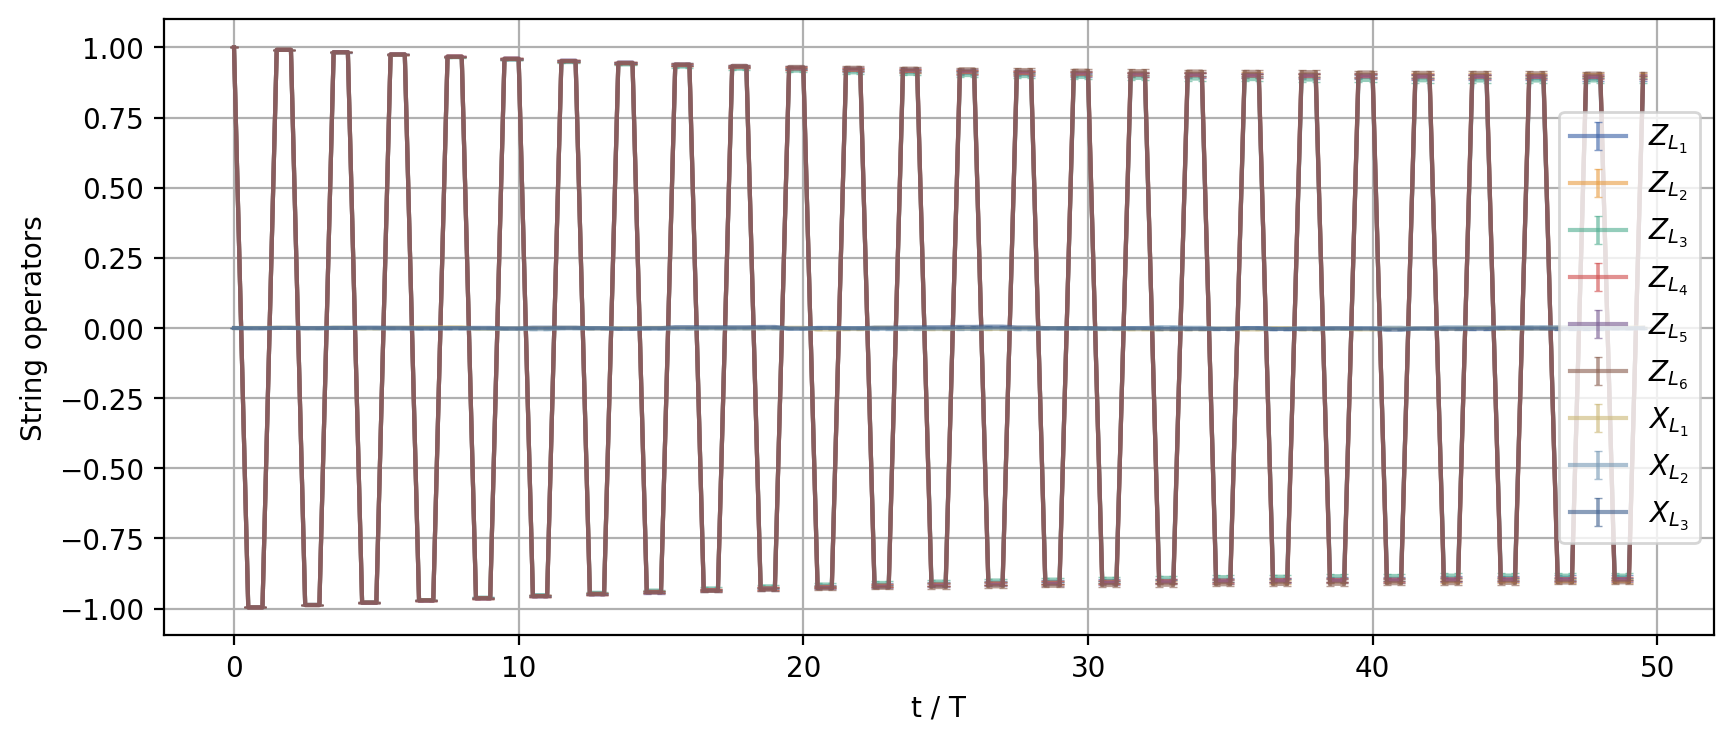

In [3]:
ts = figS3_data["ts"]
Zl_avg = figS3_data["Zl_avg"]
Zl_err = figS3_data["Zl_err"]
Xl_avg = figS3_data["Xl_avg"]
Xl_err = figS3_data["Xl_err"]
plt.figure(figsize=(10, 4), dpi=200)
for i in range(len(Zl_avg[0])):
    plt.errorbar(
        ts,
        Zl_avg[:, i],
        Zl_err[:, i],
        label=label_dict_Z[f"{i}"],
        color=label_colors_1[i],
        elinewidth=1.3,
        ls="-",
        linewidth=1.5,
        capsize=1.5,
        capthick=0.5,
        alpha=0.6,
    )
for i in range(len(Xl_avg[0])):
    plt.errorbar(
        ts,
        Xl_avg[:, i],
        Xl_err[:, i],
        label=label_dict_X[f"{i}"],
        color=label_colors_2[i],
        elinewidth=1.3,
        ls="-",
        linewidth=1.5,
        capsize=1.5,
        capthick=0.5,
        alpha=0.6,
    )
plt.legend()
plt.grid()
plt.ylabel("String operators")
plt.xlabel("t / T")

# Fig3.B, C

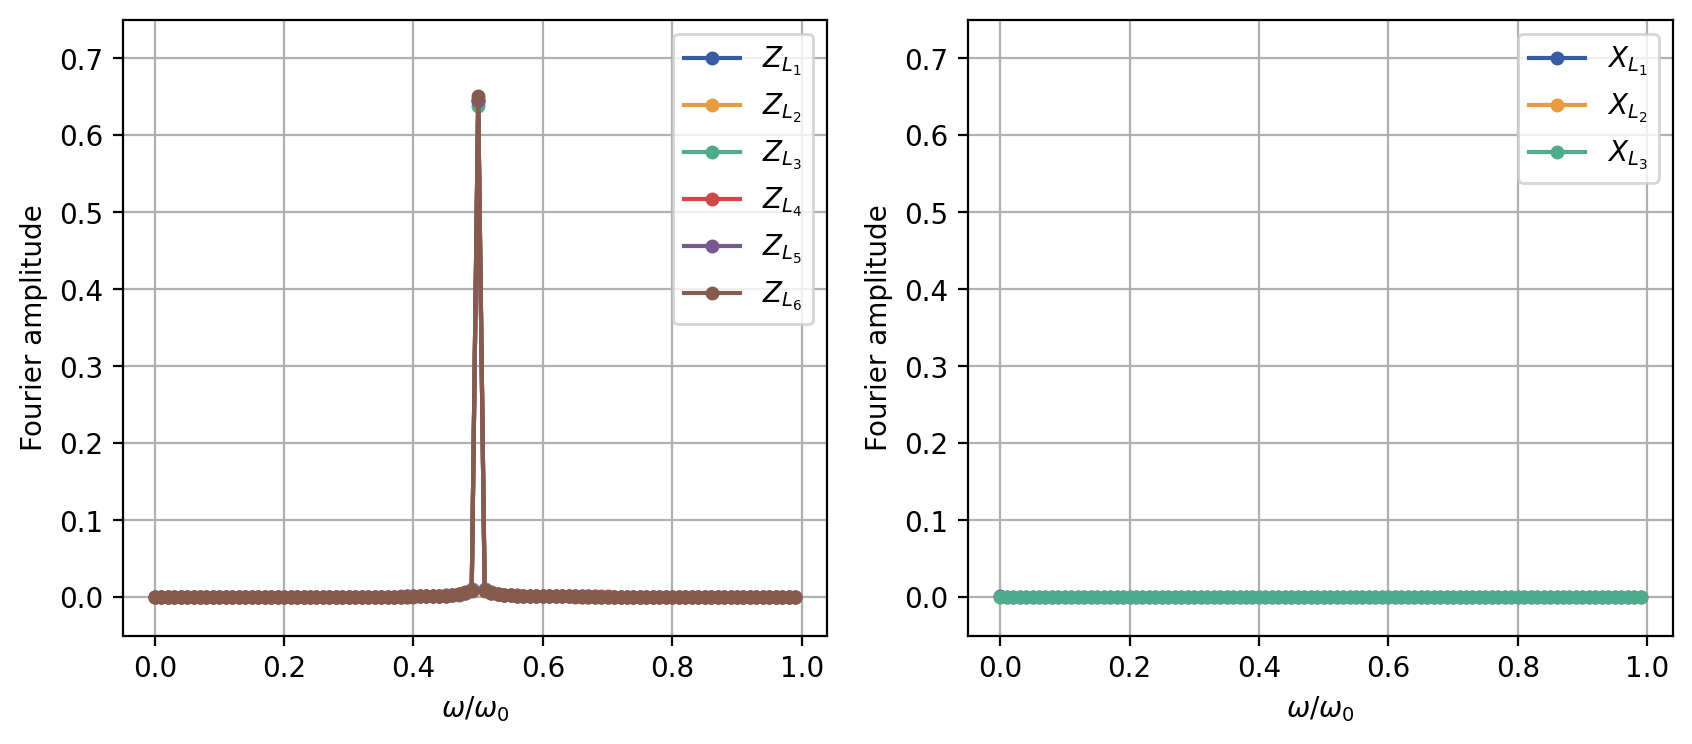

In [4]:
freqs = figS3_data["freqs"]
Zl_fft = figS3_data["Zl_fft"]
Xl_fft = figS3_data["Xl_fft"]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=200)
for i in range(len(Zl_fft[0])):
    axes[0].plot(
        freqs,
        Zl_fft[:, i],
        label=label_dict_Z[f"{i}"],
        color=label_colors_1[i],
        ls="-",
        marker="o",
        markersize=4.0,
        linewidth=1.5,
    )
    axes[0].set_ylim([-0.05, 0.75])
    axes[0].legend()
    axes[0].grid(1)
    axes[0].set_ylabel("Fourier amplitude")
    axes[0].set_xlabel(r"$\omega / \omega_0$")
for i in range(len(Xl_fft[0])):
    axes[1].plot(
        freqs,
        Xl_fft[:, i],
        label=label_dict_X[f"{i}"],
        color=label_colors_1[i],
        ls="-",
        marker="o",
        markersize=4.0,
        linewidth=1.5,
    )
    axes[1].set_ylim([-0.05, 0.75])
    axes[1].legend()
    axes[1].grid(1)
    axes[1].set_ylabel("Fourier amplitude")
    axes[1].set_xlabel(r"$\omega / \omega_0$")

# Fig3.D, E

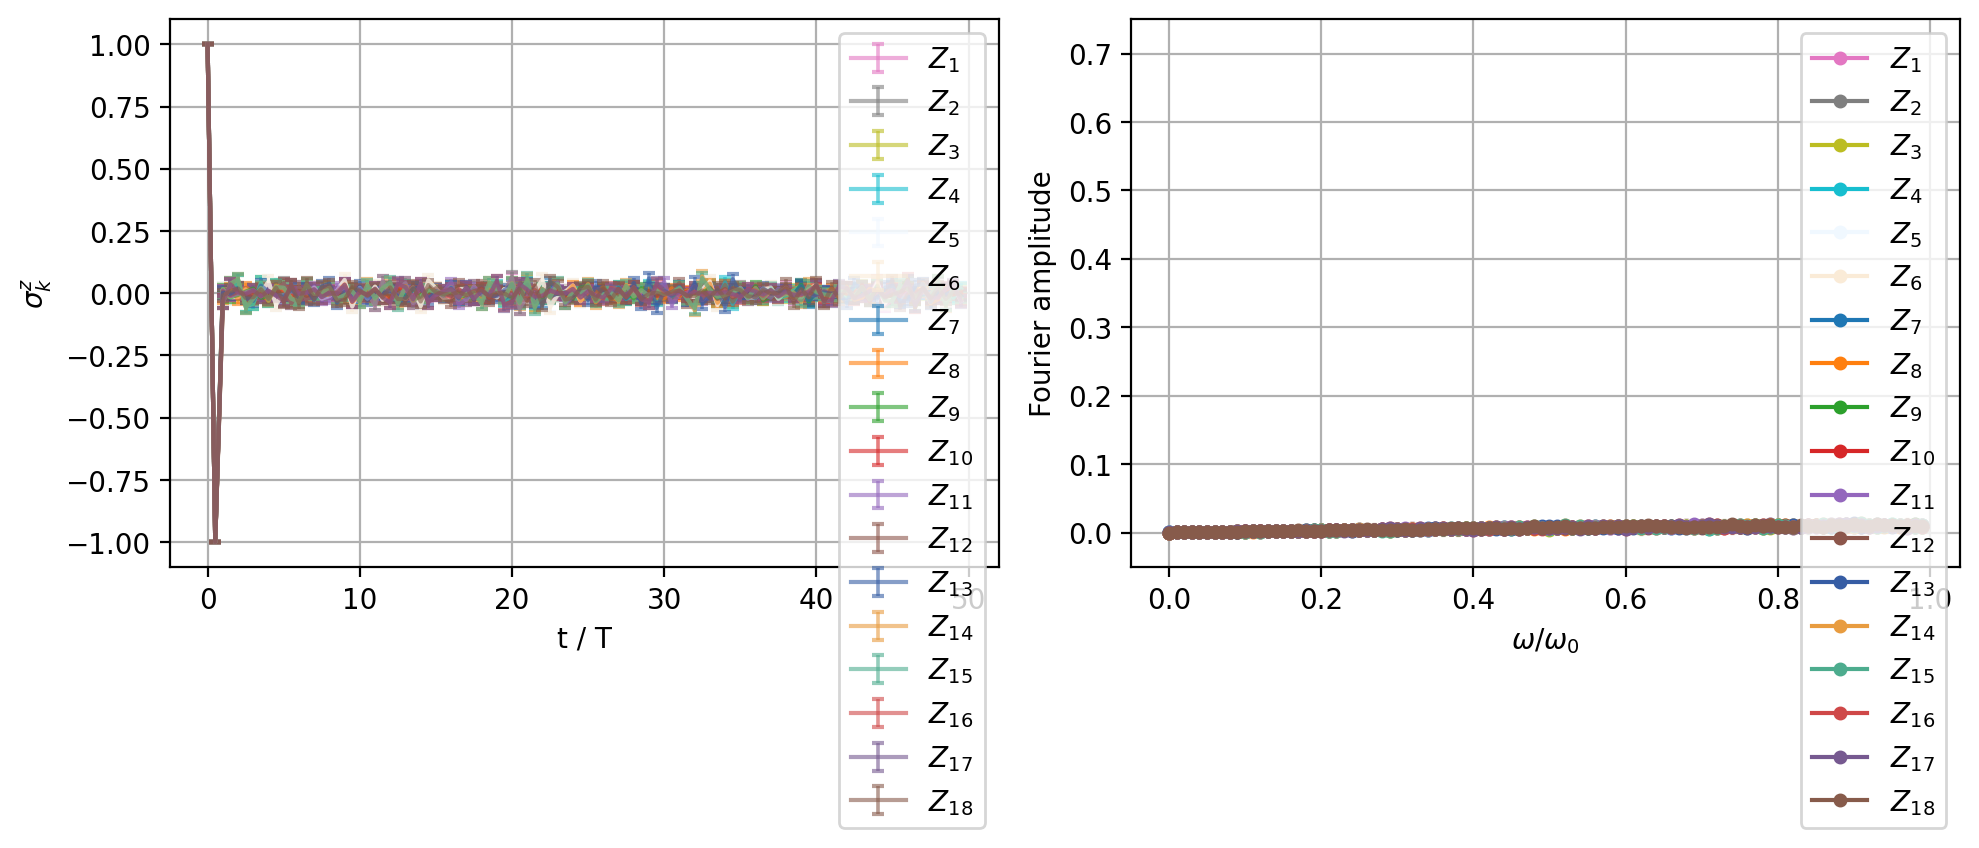

In [5]:
ts = figS3_data["ts"]
Z_avg = figS3_data["Z_avg"]
Z_err = figS3_data["Z_err"]
Z_fft = figS3_data["Z_fft"]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=200)
for i in range(len(Z_avg[0])):
    axes[0].errorbar(
        ts,
        Z_avg[:, i],
        Z_err[:, i],
        label=label_dict_sigmaZ[f"{i+1}"],
        color=(label_colors_0 + label_colors_1 + label_colors_2)[i],
        elinewidth=1.3,
        ls="-",
        linewidth=1.5,
        capsize=2.0,
        capthick=1.5,
        alpha=0.6,
    )
    axes[0].legend()
    axes[0].grid(1)
    axes[0].set_ylabel(r"$\sigma_k^z$")
    axes[0].set_xlabel("t / T")
for i in range(len(Z_fft[0])):
    axes[1].plot(
        freqs,
        Z_fft[:, i],
        label=label_dict_sigmaZ[f"{i+1}"],
        color=(label_colors_0 + label_colors_1 + label_colors_2)[i],
        ls="-",
        marker="o",
        markersize=4.0,
        linewidth=1.5,
    )
    axes[1].set_ylim([-0.05, 0.75])
    axes[1].legend()
    axes[1].grid(1)
    axes[1].set_ylabel("Fourier amplitude")
    axes[1].set_xlabel(r"$\omega / \omega_0$")
plt.tight_layout()